# [**Workflows for atomistic simulations**](http://potentials.rub.de/) 

## **Day 1 - Atomistic simulations with [pyiron](https://pyiron.org)**


### **Exercise 1: Introduction to atomistic simulations with pyiron**

Before the excercise, you should:

* Be familiar with python especially with numerical libraries like numpy and plotting tools like matplotlib
* Understand how Jupyter Notebooks work

The aim of this exercise is to make you familiar with:

* A general overview of what pyiron can do
* How to set up atomic structures and run atomistic simulation codes through pyiron

### **Importing necessary libraries**

As a first step we import the libraries [numpy](http://www.numpy.org/) for data analysis and [matplotlib](https://matplotlib.org/) for visualization.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

Fundamentally, we only need to import one module from `pyiron`: the `Project` class

In [2]:
from pyiron import Project

The Project object introduced below is central in pyiron. It allows to name the project as well as to derive all other objects such as structures, jobs etc. without having to import them. Thus, by code completion *Tab* the respective commands can be found easily.

We now create a pyiron Project named 'first_steps'.

### **Creation of a project instance**

In [3]:
pr = Project("first_steps")

# Remove the jobs
pr.remove_jobs_silently(recursive=True)

The project name also applies for the directory that is created for the project. All data generated by this `Project` object resides in this directory.

In [4]:
pr.path

'/home/surendralal/notebooks/pyiron_potentialfit/day_1/first_steps/'

In [5]:
pr

{'groups': ['Al_H_Ni_Angelo_eam', 'Al_Mg_Mendelev_eam', 'E_V_curve', 'Zope_Ti_Al_2003_eam'], 'nodes': []}

### **Creating atomic structures**

Every atomistic simulation needs an atomic structure. For more details on generating and manipulating structures, please have a look at our [structures example](https://pyiron.readthedocs.io/en/latest/source/notebooks/structures.html). In this section however, we show how to generate and manipulate bulk crystals, surfaces, and certain special structures

In [6]:
# Creating a bulk fcc cubic unitcell
Al_unitcell_cubic = pr.create_ase_bulk('Al', cubic=True, a=4.01)
Al_unitcell_cubic

Al: [0. 0. 0.]
Al: [0.    2.005 2.005]
Al: [2.005 0.    2.005]
Al: [2.005 2.005 0.   ]
pbc: [ True  True  True]
cell: 
Cell([4.01, 4.01, 4.01])

In [7]:
Al_supercell_3_3_3 = Al_unitcell_cubic.repeat([3, 3, 3])
Al_supercell_3_3_3.plot3d()

NGLWidget()

In [8]:
# Creating a bulk fcc primitive unitcell and cupercell
Al_unitcell_primitive = pr.create_ase_bulk('Al', a=4.01)
Al_unitcell_primitive.repeat([3, 3, 3]).plot3d()

NGLWidget()

In [9]:
# Creating a vacancy in a supercell
Al_vacancy = Al_unitcell_cubic[1:] # Excluding the first atom
print(Al_unitcell_cubic.get_chemical_formula(), Al_vacancy.get_chemical_formula())
Al_vacancy.plot3d()

Al4 Al3


NGLWidget()

In [58]:
# Creating a fcc111 surface supercell
num_layers = 4
Al_fcc_111 = pr.create_surface("Al", surface_type="fcc111", size=(4, 4, num_layers), vacuum=12, orthogonal=True)
Al_fcc_111.plot3d()

NGLWidget()

In [59]:
# Atom in a box
cell = np.eye(3) * 10
Al_atom_box = pr.create_atoms("Al", cell=cell, scaled_positions=[[0.5, 0.5, 0.5]])
Al_atom_box.plot3d()

NGLWidget()

In [60]:
# Al-Al dimer
cell = np.eye(3) * 10
Al_atom_1 = pr.create_atoms("Al", cell=cell, scaled_positions=[[0.5, 0.5, 0.5]])
Al_atom_2 = Al_atom_1.copy()

dimer_length = 2.5
Al_atom_2.positions[:, 2] += dimer_length
Al_dimer = Al_atom_1 + Al_atom_2
Al_dimer.center()
Al_dimer.plot3d()

NGLWidget()

### **Running an atomistic calculation using interatomic potentials (with LAMMPS)**

In [61]:
# Create a job
job_lammps = pr.create_job(pr.job_type.Lammps, "lammps_job")

In [62]:
# Assign a structure
job_lammps.structure = Al_supercell_3_3_3

In [63]:
# See available potentials
print(job_lammps.list_potentials())

['Al_Mg_Mendelev_eam', 'Zope_Ti_Al_2003_eam', 'Al_H_Ni_Angelo_eam', '2018--Dickel-D-E--Mg-Al-Zn--LAMMPS--ipr1', '2000--Landa-A--Al-Pb--LAMMPS--ipr1', '2004--Zhou-X-W--Al--LAMMPS--ipr2', '2003--Zope-R-R--Al--LAMMPS--ipr1', '2015--Mendelev-M-I--Al-Sm--LAMMPS--ipr1', '1997--Liu-X-Y--Al-Mg--LAMMPS--ipr1', '2004--Zhou-X-W--Al--LAMMPS--ipr1', '1995--Angelo-J-E--Ni-Al-H--LAMMPS--ipr1', '2015--Pascuet-M-I--Al-U--LAMMPS--ipr2', '1999--Liu-X-Y--Al-Cu--LAMMPS--ipr1', '2015--Pascuet-M-I--Al--LAMMPS--ipr1', '1998--Liu-X-Y--Al-Mg--LAMMPS--ipr1', '2015--Purja-Pun-G-P--Ni-Al-Co--LAMMPS--ipr2', '2009--Mendelev-M-I--Al-Mg--LAMMPS--ipr1', '2002--Mishin-Y--Ni-Al--LAMMPS--ipr1', '2012--Schopf-D--Al-Mn-Pd--LAMMPS--ipr1', '2000--Sturgeon-J-B--Al--LAMMPS--ipr1', '2003--Zope-R-R--Ti-Al--LAMMPS--ipr1', '2009--Zhakhovskii-V-V--Al--LAMMPS--ipr1', '2015--Purja-Pun-G-P--Ni-Al-Co--LAMMPS--ipr1', '1996--Farkas-D--Nb-Ti-Al--LAMMPS--ipr1', '2015--Purja-Pun-G-P--Al-Co--LAMMPS--ipr1', '2015--Purja-Pun-G-P--Al-Co--LAMMPS-

In [64]:
# Choose one of these potentials
job_lammps.potential = 'Al_Mg_Mendelev_eam'

In [65]:
# specify calculation details: in this case: MD at 800 K in the NPT ensemble (pressure=0) for 10000 steps
job_lammps.calc_md(temperature=800, pressure=0, n_ionic_steps=10000)

In [66]:
job_lammps.run()

The job lammps_job was saved and received the ID: 3755


In [19]:
pr.list_all()

{'groups': ['Al_H_Ni_Angelo_eam',
  'Al_Mg_Mendelev_eam',
  'E_V_curve',
  'Zope_Ti_Al_2003_eam'],
 'nodes': ['lammps_job'],
 'files': ['lammps_job.h5']}

In [20]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,3707,finished,Al108,lammps_job,/lammps_job,/home/surendralal/,notebooks/pyiron_potentialfit/day_1/first_steps/,2021-02-19 10:08:44.630343,2021-02-19 10:08:59.064445,14.0,pyiron@cmdell17#1,Lammps,0.1,None,None


## Analysing a calculation

In [21]:
job = pr['lammps_job']
job

{'groups': ['input', 'output'], 'nodes': ['HDF_VERSION', 'NAME', 'TYPE', 'VERSION', 'server', 'status']}

In [22]:
job['output/generic']

{'groups': [], 'nodes': ['cells', 'energy_pot', 'energy_tot', 'forces', 'indices', 'positions', 'pressures', 'steps', 'temperature', 'unwrapped_positions', 'velocities', 'volume']}

In [23]:
job["output/generic/energy_tot"] # Energy for every ionic step

array([-345.90692183, -348.48728577, -345.55858798, -344.33094059,
       -344.34755046, -343.79948179, -342.79553462, -342.69513403,
       -344.57356141, -345.34899762, -344.78389292, -345.06292869,
       -343.90678188, -341.61751476, -342.45053067, -343.47360076,
       -343.99552586, -345.19581774, -346.74403161, -348.46505189,
       -347.62352649, -346.12769722, -345.0113475 , -343.58397633,
       -343.32431549, -343.71847824, -345.49022966, -346.50055794,
       -346.40425331, -343.85395182, -343.468989  , -343.6771423 ,
       -344.67126386, -345.78153209, -346.18922889, -344.57509324,
       -343.05654221, -342.82614697, -344.21868025, -346.03043761,
       -346.01295141, -345.14973886, -344.01394141, -343.93762139,
       -343.87004247, -344.62571047, -346.88983784, -347.74873837,
       -346.35025984, -345.10694795, -344.03942693, -343.39322912,
       -343.94557184, -346.16609705, -346.9278989 , -346.1526887 ,
       -344.98865562, -344.24944551, -344.05330033, -344.73760

In [24]:
job.output.energy_tot

array([-345.90692183, -348.48728577, -345.55858798, -344.33094059,
       -344.34755046, -343.79948179, -342.79553462, -342.69513403,
       -344.57356141, -345.34899762, -344.78389292, -345.06292869,
       -343.90678188, -341.61751476, -342.45053067, -343.47360076,
       -343.99552586, -345.19581774, -346.74403161, -348.46505189,
       -347.62352649, -346.12769722, -345.0113475 , -343.58397633,
       -343.32431549, -343.71847824, -345.49022966, -346.50055794,
       -346.40425331, -343.85395182, -343.468989  , -343.6771423 ,
       -344.67126386, -345.78153209, -346.18922889, -344.57509324,
       -343.05654221, -342.82614697, -344.21868025, -346.03043761,
       -346.01295141, -345.14973886, -344.01394141, -343.93762139,
       -343.87004247, -344.62571047, -346.88983784, -347.74873837,
       -346.35025984, -345.10694795, -344.03942693, -343.39322912,
       -343.94557184, -346.16609705, -346.9278989 , -346.1526887 ,
       -344.98865562, -344.24944551, -344.05330033, -344.73760

In [25]:
job.animate_structure()

NGLWidget(max_frame=100)

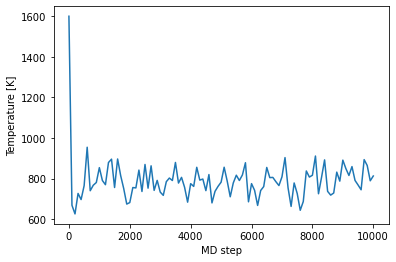

In [26]:
temperatures = job['output/generic/temperature']
steps = job['output/generic/steps']
plt.plot(steps, temperatures)
plt.xlabel('MD step')
plt.ylabel('Temperature [K]');

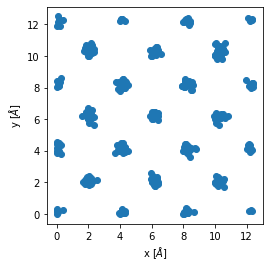

In [27]:
pos = job['output/generic/positions']
x, y, z = [pos[:, :, i] for i in range(3)]
sel = np.abs(z) < 0.1
fig, axs = plt.subplots(1,1)
axs.scatter(x[sel], y[sel])
axs.set_xlabel('x [$\AA$]')
axs.set_ylabel('y [$\AA$]')
axs.set_aspect('equal', 'box');

### **Running an atomistic calculation using DFT (with SPHInX)**

In [28]:
job_sphinx = pr.create_job(pr.job_type.Sphinx, "sphinx_job")
job_sphinx.structure = Al_unitcell_cubic
job_sphinx.set_exchange_correlation_functional("PBE")
job_sphinx.plane_wave_cutoff = 350
job_sphinx.calc_static()
job_sphinx.run()

The job sphinx_job was saved and received the ID: 3708


In [29]:
job_sphinx['output/generic/']

{'groups': ['dft'], 'nodes': ['cells', 'computation_time', 'energy_pot', 'energy_tot', 'forces', 'positions', 'volume']}

In [30]:
job_sphinx['output/generic/dft']

{'groups': [], 'nodes': ['bands_e_fermi', 'bands_eigen_values', 'bands_k_weights', 'bands_occ', 'computation_time', 'electronic_entropy', 'energy_band', 'energy_free', 'energy_int', 'energy_zero', 'n_valence', 'residue', 'scf_computation_time', 'scf_convergence', 'scf_electronic_entropy', 'scf_energy_band', 'scf_energy_free', 'scf_energy_int', 'scf_energy_zero', 'scf_residue']}

In [31]:
job_sphinx["output/generic/energy_tot"] # Energy for every ionic step

array([-228.96698131])

# ** change the examples to Cu**

- Murnaghan with Cu using DFT

## **Task 1: Energy volume curve for Al**

In [32]:
def get_volume(job):
    return job.get_structure().get_volume()

In [33]:
def get_energy(job):
    return job.output.energy_tot[-1]

In [34]:
pr_ev = pr.create_group("E_V_curve") # Creating a new sub-project within the main project
a_list = np.linspace(3.7, 4.2, 11)
for a in a_list:
    job_name = "job_a_{:.4}".format(a).replace(".", "_")
    job = pr_ev.create_job(pr_ev.job_type.Lammps, job_name)
    job.structure = pr_ev.create_ase_bulk("Al", a=a, cubic=True)
    job.potential = 'Al_Mg_Mendelev_eam'
    job.calc_minimize()
    job.run()
    

The job job_a_3_7 was saved and received the ID: 3709
The job job_a_3_75 was saved and received the ID: 3710
The job job_a_3_8 was saved and received the ID: 3711
The job job_a_3_85 was saved and received the ID: 3712
The job job_a_3_9 was saved and received the ID: 3713
The job job_a_3_95 was saved and received the ID: 3714
The job job_a_4_0 was saved and received the ID: 3715
The job job_a_4_05 was saved and received the ID: 3716
The job job_a_4_1 was saved and received the ID: 3717
The job job_a_4_15 was saved and received the ID: 3718
The job job_a_4_2 was saved and received the ID: 3719


In [35]:
pr.list_groups(), pr.list_nodes()

(['Al_H_Ni_Angelo_eam',
  'Al_Mg_Mendelev_eam',
  'E_V_curve',
  'Zope_Ti_Al_2003_eam'],
 ['lammps_job', 'sphinx_job'])

In [36]:
pr_ev.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,3709,finished,Al4,job_a_3_7,/job_a_3_7,/home/surendralal/,notebooks/pyiron_potentialfit/day_1/first_steps/E_V_curve/,2021-02-19 10:09:15.132013,2021-02-19 10:09:16.531847,1.0,pyiron@cmdell17#1,Lammps,0.1,None,None
1,3710,finished,Al4,job_a_3_75,/job_a_3_75,/home/surendralal/,notebooks/pyiron_potentialfit/day_1/first_steps/E_V_curve/,2021-02-19 10:09:17.919547,2021-02-19 10:09:19.275784,1.0,pyiron@cmdell17#1,Lammps,0.1,None,None
2,3711,finished,Al4,job_a_3_8,/job_a_3_8,/home/surendralal/,notebooks/pyiron_potentialfit/day_1/first_steps/E_V_curve/,2021-02-19 10:09:20.612154,2021-02-19 10:09:21.971047,1.0,pyiron@cmdell17#1,Lammps,0.1,None,None
3,3712,finished,Al4,job_a_3_85,/job_a_3_85,/home/surendralal/,notebooks/pyiron_potentialfit/day_1/first_steps/E_V_curve/,2021-02-19 10:09:23.239006,2021-02-19 10:09:24.512445,1.0,pyiron@cmdell17#1,Lammps,0.1,None,None
4,3713,finished,Al4,job_a_3_9,/job_a_3_9,/home/surendralal/,notebooks/pyiron_potentialfit/day_1/first_steps/E_V_curve/,2021-02-19 10:09:25.805368,2021-02-19 10:09:27.092887,1.0,pyiron@cmdell17#1,Lammps,0.1,None,None
5,3714,finished,Al4,job_a_3_95,/job_a_3_95,/home/surendralal/,notebooks/pyiron_potentialfit/day_1/first_steps/E_V_curve/,2021-02-19 10:09:28.291653,2021-02-19 10:09:29.323109,1.0,pyiron@cmdell17#1,Lammps,0.1,None,None
6,3715,finished,Al4,job_a_4_0,/job_a_4_0,/home/surendralal/,notebooks/pyiron_potentialfit/day_1/first_steps/E_V_curve/,2021-02-19 10:09:30.623851,2021-02-19 10:09:31.997446,1.0,pyiron@cmdell17#1,Lammps,0.1,None,None
7,3716,finished,Al4,job_a_4_05,/job_a_4_05,/home/surendralal/,notebooks/pyiron_potentialfit/day_1/first_steps/E_V_curve/,2021-02-19 10:09:33.313181,2021-02-19 10:09:34.610882,1.0,pyiron@cmdell17#1,Lammps,0.1,None,None
8,3717,finished,Al4,job_a_4_1,/job_a_4_1,/home/surendralal/,notebooks/pyiron_potentialfit/day_1/first_steps/E_V_curve/,2021-02-19 10:09:35.987850,2021-02-19 10:09:37.402333,1.0,pyiron@cmdell17#1,Lammps,0.1,None,None
9,3718,finished,Al4,job_a_4_15,/job_a_4_15,/home/surendralal/,notebooks/pyiron_potentialfit/day_1/first_steps/E_V_curve/,2021-02-19 10:09:38.751469,2021-02-19 10:09:39.871885,1.0,pyiron@cmdell17#1,Lammps,0.1,None,None


In [37]:
pr.iter_jobs?

Signature:
pr.iter_jobs(
    path=None,
    recursive=True,
    convert_to_object=True,
    status=None,
)
Docstring:
Iterate over the jobs within the current project and it is sub projects

Args:
    path (str): HDF5 path inside each job object
    recursive (bool): search subprojects [True/False] - True by default
    convert_to_object (bool): load the full GenericJob object (default) or just the HDF5 / JobCore object
    status (str/None): status of the jobs to filter for - ['finished', 'aborted', 'submitted', ...]

Returns:
    yield: Yield of GenericJob or JobCore
File:      ~/miniconda3/envs/potfit/lib/python3.8/site-packages/pyiron_base/project/generic.py
Type:      method


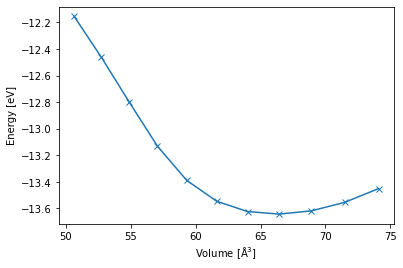

In [38]:
# Analysing the data
vol_list = list()
energy_list = list()

for job in pr["E_V_curve"].iter_jobs(status="finished"):
    vol_list.append(get_volume(job))
    energy_list.append(get_energy(job))

args = np.argsort(vol_list)
vol_list = np.array(vol_list)
energy_list = np.array(energy_list)
plt.plot(vol_list[args], energy_list[args], "-x")
plt.xlabel("Volume [$\mathrm{\AA^3}$]")
plt.ylabel("Energy [eV]");

## **Task 2: E-V curves for a series of potentials (to be done by yourself)**

In [43]:
num_pot = 3
pot_finder = pr.inspect_emperical_potentials()
pot_list = pot_finder.find("Al").Name.to_list()[0:num_pot]
pot_list

['Al_Mg_Mendelev_eam', 'Zope_Ti_Al_2003_eam', 'Al_H_Ni_Angelo_eam']

In [44]:
a_list = np.linspace(3.7, 4.2, 11)
pr = Project("E_V_potentials")
for pot in pot_list:
    pr_ev = pr.create_group(pot)
    for a in a_list:
        job_name = "job_a_{:.4}".format(a).replace(".", "_")
        job = pr_ev.create_job(pr_ev.job_type.Lammps, job_name)
        job.structure = pr_ev.create_ase_bulk("Al", a=a, cubic=True)
        job.potential = pot
        job.calc_minimize()
        job.run()

The job job_a_3_7 was saved and received the ID: 3721
The job job_a_3_75 was saved and received the ID: 3722
The job job_a_3_8 was saved and received the ID: 3723
The job job_a_3_85 was saved and received the ID: 3724
The job job_a_3_9 was saved and received the ID: 3725
The job job_a_3_95 was saved and received the ID: 3726
The job job_a_4_0 was saved and received the ID: 3727
The job job_a_4_05 was saved and received the ID: 3728
The job job_a_4_1 was saved and received the ID: 3729
The job job_a_4_15 was saved and received the ID: 3730
The job job_a_4_2 was saved and received the ID: 3731
The job job_a_3_7 was saved and received the ID: 3732
The job job_a_3_75 was saved and received the ID: 3733
The job job_a_3_8 was saved and received the ID: 3734
The job job_a_3_85 was saved and received the ID: 3735
The job job_a_3_9 was saved and received the ID: 3736
The job job_a_3_95 was saved and received the ID: 3737
The job job_a_4_0 was saved and received the ID: 3738
The job job_a_4_05 w

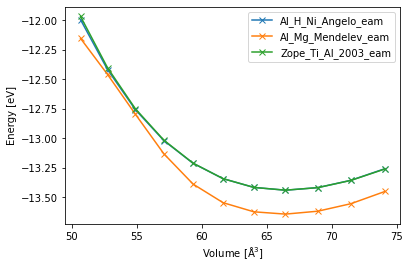

In [69]:
for pr_pot in pr.iter_groups():
    vol_list = list()
    energy_list = list()
    pot = pr_pot.name
    for job in pr_pot.iter_jobs(status="finished"):
        vol_list.append(get_volume(job))
        energy_list.append(get_energy(job))
    args = np.argsort(vol_list)
    vol_list = np.array(vol_list)
    energy_list = np.array(energy_list)
    plt.plot(vol_list[args], energy_list[args], "-x", label=pot)
plt.legend()    
plt.xlabel("Volume [$\mathrm{\AA^3}$]")
plt.ylabel("Energy [eV]");

Day 1 suggestions

- Intro to the workshop before this
- projects, auto-completion, show how pyiron is used in practice
- important: demo how easy it is to do DFT calcs.
- no need for automated workflows: Phonopy, Murnaghan (yet)
- tasks to participants: probably not a goos idea! Let the tutor guide them interactively! 
- the participants already have the code. Make changes on the fly

- Skip Murn/phonopy workflows (shift to day 3) (skip pyiron tables)
- Creating datasets (using pyiron) / <u>working with a bit (neigh, energies, forces)
- Interactive way with 3-4 groups
- 3 blocks: General introduction, creating structures, working with datasets
- Jörg: working with datasets maybe not that important on day 1
    
    
- Take data in project and store in the structure container
- List of TODOs: what kind of structures can you add (random noise on the atomic positions), diff types of structures, analyze structures if you have time

Day 3:
    
    - Murnaghan, Harmonic free energies (phonons), surface energies, 
    - Maybe see if can reproduce the forces and energies in the dataset (compare with bulk, surfaces, etc.)
    
    - Time output to approximate how long each step takes!
    - Next to 